In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [5]:
df = pd.read_csv('dataset.csv')
df.head()


,Unnamed: 0,image,label,class,x_center,y_center,width,height
0,0,monitoring_system_4.JPG,monitoring_system_4.txt,0,0.180625,0.650833,0.12875,0.058333
1,1,monitoring_system_1817.JPG,monitoring_system_1817.txt,0,0.747500,0.034167,0.07250,0.031667
2,2,monitoring_system_1864.JPG,monitoring_system_1864.txt,0,0.714375,0.152500,0.09625,0.041667
3,3,monitoring_system_2484.JPG,monitoring_system_2484.txt,0,0.632500,0.625833,0.12750,0.058333
4,4,monitoring_system_2066.JPG,monitoring_system_2066.txt,0,0.885000,0.085000,0.08750,0.040000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3840 non-null   int64  
 1   image       3840 non-null   object 
 2   label       3840 non-null   object 
 3   class       3840 non-null   int64  
 4   x_center    3840 non-null   float64
 5   y_center    3840 non-null   float64
 6   width       3840 non-null   float64
 7   height      3840 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 240.1+ KB


In [7]:
df.shape

(3840, 8)

In [8]:
filename = df['image'][0]
filename

'monitoring_system_4.JPG'

In [9]:
def getFilename(filename):
    filepath_image = os.path.join('brasil',filename)
    return filepath_image

In [10]:
getFilename(filename)

'brasil/monitoring_system_4.JPG'

In [11]:
df['image_path'] = list(df['image'].apply(getFilename))
df['image_path']

0          brasil/monitoring_system_4.JPG
1       brasil/monitoring_system_1817.JPG
2       brasil/monitoring_system_1864.JPG
3       brasil/monitoring_system_2484.JPG
4       brasil/monitoring_system_2066.JPG
                      ...                
3835    brasil/monitoring_system_2793.JPG
3836     brasil/monitoring_system_264.JPG
3837    brasil/monitoring_system_2718.JPG
3838           brasil/parking_lot1_35.JPG
3839    brasil/monitoring_system_1013.JPG
Name: image_path, Length: 3840, dtype: object

#### verify image and output

In [12]:
file_path = df['image_path'][0]
file_path 

'brasil/monitoring_system_4.JPG'

In [13]:
img = cv2.imread(file_path)


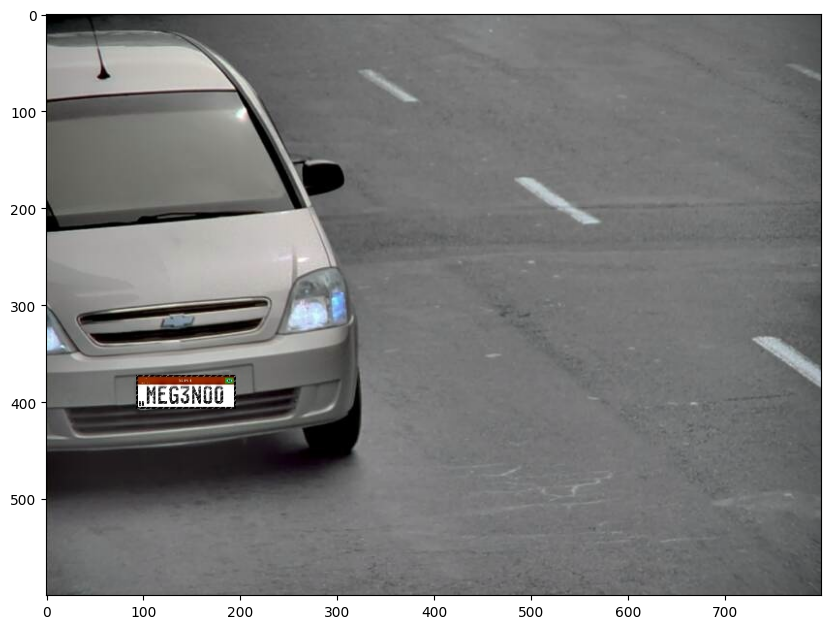

In [14]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [15]:
x_center = df['x_center'][0]
y_center = df['y_center'][0]
width = df['width'][0]
height = df['height'][0]

x_min = x_center - (width/2)
x_max = x_center + (width/2)
y_min = y_center - (height/2)
y_max = y_center + (height/2)
coords = [[x_min, x_max,y_min,y_max]]

In [16]:
coords

[[0.11625, 0.245, 0.6216665, 0.6799995]]

In [17]:
# size of the orginal image
h,w,d = img.shape
print('Height of the image =',h)
print('Width of the image =',w)
print('d =',d)

Height of the image = 600
Width of the image = 800
d = 3


In [18]:
# denormalize the values
denorm = np.array([w,w,h,h])
coor = coords * denorm
coor

array([[ 93.    , 196.    , 372.9999, 407.9997]])

In [19]:
# draw bounding on top the image
xmin,xmax,ymin,ymax = coor[0]
pt1 =(int(xmin),int(ymin))
pt2 =(int(xmax),int(ymax))
print(pt1, pt2)
cv2.rectangle(img,pt1,pt2,(0,255,0),3)

(93, 372) (196, 407)


array([[[ 2,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [77, 79, 79],
        [76, 78, 78],
        [76, 78, 78]],

       [[ 2,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [76, 78, 78],
        [76, 78, 78],
        [76, 78, 78]],

       [[ 2,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [75, 77, 77],
        [75, 77, 77],
        [75, 77, 77]],

       ...,

       [[66, 66, 66],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [72, 74, 74],
        [74, 76, 76],
        [75, 77, 77]],

       [[58, 58, 58],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [68, 70, 70],
        [70, 72, 72],
        [72, 74, 74]],

       [[52, 52, 52],
        [75, 75, 75],
        [81, 81, 81],
        ...,
        [67, 69, 69],
        [67, 69, 69],
        [69, 71, 71]]], dtype=uint8)

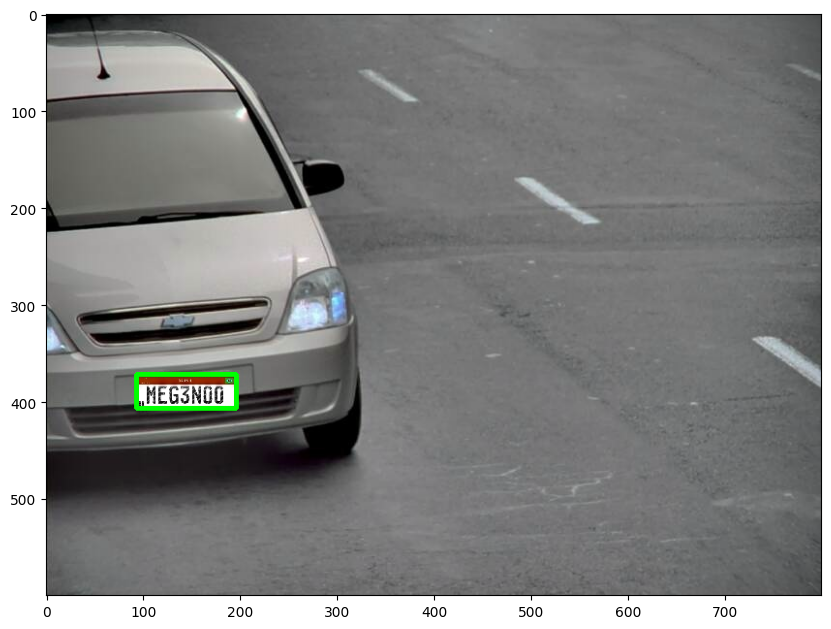

In [20]:


plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

### Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [22]:
auxDf = df[['image_path','x_center','y_center','width','height']]

In [23]:
labels = auxDf.iloc[:,0:].values

In [24]:
labels

array([['brasil/monitoring_system_4.JPG', 0.180625, 0.650833, 0.12875,
        0.058333],
       ['brasil/monitoring_system_1817.JPG', 0.7475, 0.034167, 0.0725,
        0.031667],
       ['brasil/monitoring_system_1864.JPG', 0.714375, 0.1525, 0.09625,
        0.041667],
       ...,
       ['brasil/monitoring_system_2718.JPG', 0.925625, 0.0875, 0.08375,
        0.035],
       ['brasil/parking_lot1_35.JPG', 0.38894, 0.544118, 0.057904,
        0.046841],
       ['brasil/monitoring_system_1013.JPG', 0.494375, 0.3675, 0.11125,
        0.048333]], dtype=object)

In [25]:
len(df['image_path'])

3840

In [26]:
len(df)

3840

In [27]:
data = []
output = []
for ind in range(len(df)):
    # normalization to labels
    image,x_center,y_center,width,height = labels[ind]
    
    # Verificar si el archivo de imagen existe
    if not os.path.exists(image):
        print(f"El archivo de imagen {image} no existe.")
        continue
    
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
   
    label_norm = (x_center,y_center,width,height)
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

El archivo de imagen brasil/parking_lot1_188.JPG no existe.
El archivo de imagen brasil/parking_lot1_98.JPG no existe.
El archivo de imagen brasil/parking_lot1_37.JPG no existe.
El archivo de imagen brasil/parking_lot1_99.JPG no existe.
El archivo de imagen brasil/parking_lot1_36.JPG no existe.
El archivo de imagen brasil/parking_lot1_89.JPG no existe.
El archivo de imagen brasil/parking_lot1_100.JPG no existe.
El archivo de imagen brasil/parking_lot1_88.JPG no existe.


In [28]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [29]:
X.shape,y.shape

((3832, 224, 224, 3), (3832, 4))

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3065, 224, 224, 3), (767, 224, 224, 3), (3065, 4), (767, 4))

### Deep Learning Model

In [31]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf 
from tensorflow import keras

In [28]:
#Vamos a armar un modelo convolucional - Va a tener 8 capas de convolución y pooling, 2 capas ocultas con dropout cada una, y al final una capa densa con softmax para clasificación
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size = 3, activation = "relu", padding = "SAME")

In [33]:

# Cargar el modelo base pre-entrenado
inception_resnet = MobileNetV2(weights="imagenet", include_top=False,
                                     input_tensor=Input(shape=(224, 224, 3)))
inception_resnet.trainable = False

# Agregar capas adicionales al modelo
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(250, activation="relu")(headmodel)
headmodel = Dense(250, activation="relu")(headmodel) 
headmodel = Dense(4, activation='sigmoid')(headmodel)

# Construir el modelo final
model = Model(inputs=inception_resnet.input, outputs=headmodel)

# Compilar el modelo
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics =["accuracy"])



In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

### model training

In [35]:
from tensorflow.keras.callbacks import TensorBoard

In [36]:
tfb = TensorBoard('object_detection_brasil_e')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)

In [37]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(x=x_train, y=y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb, early_stopping_cb])


Epoch 1/20
96/96 [==============================] - 62s 612ms/step - loss: 0.0131 - accuracy: 0.8496 - val_loss: 0.0103 - val_accuracy: 0.8566
Epoch 2/20
96/96 [==============================] - 77s 801ms/step - loss: 0.0066 - accuracy: 0.8920 - val_loss: 0.0099 - val_accuracy: 0.8709
Epoch 3/20
96/96 [==============================] - 70s 724ms/step - loss: 0.0042 - accuracy: 0.9171 - val_loss: 0.0094 - val_accuracy: 0.8592
Epoch 4/20
96/96 [==============================] - 68s 705ms/step - loss: 0.0031 - accuracy: 0.9250 - val_loss: 0.0089 - val_accuracy: 0.8735
Epoch 5/20
96/96 [==============================] - 66s 691ms/step - loss: 0.0022 - accuracy: 0.9295 - val_loss: 0.0087 - val_accuracy: 0.8748
Epoch 6/20
96/96 [==============================] - 69s 715ms/step - loss: 0.0015 - accuracy: 0.9488 - val_loss: 0.0083 - val_accuracy: 0.8957
Epoch 7/20
96/96 [==============================] - 63s 659ms/step - loss: 9.8174e-04 - accuracy: 0.9520 - val_loss: 0.0082 - val_accuracy: 0.

In [40]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 8s 325ms/step - loss: 0.0081 - accuracy: 0.8866
Loss: 0.00812905840575695
Accuracy: 0.8865710496902466


In [41]:
model.save('./models/object_detection_brasil_e_20.h5')

In [42]:

model.fit(x=x_train, y=y_train, epochs=40, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb,early_stopping_cb],initial_epoch=20)

Epoch 21/40
96/96 [==============================] - 58s 603ms/step - loss: 2.2144e-04 - accuracy: 0.9794 - val_loss: 0.0081 - val_accuracy: 0.8879
Epoch 22/40
96/96 [==============================] - 63s 653ms/step - loss: 2.3962e-04 - accuracy: 0.9719 - val_loss: 0.0081 - val_accuracy: 0.8905
Epoch 23/40
96/96 [==============================] - 62s 649ms/step - loss: 2.3744e-04 - accuracy: 0.9736 - val_loss: 0.0081 - val_accuracy: 0.8996
Epoch 24/40
96/96 [==============================] - 64s 672ms/step - loss: 2.2978e-04 - accuracy: 0.9736 - val_loss: 0.0080 - val_accuracy: 0.8905
Epoch 25/40
96/96 [==============================] - 66s 688ms/step - loss: 2.3997e-04 - accuracy: 0.9765 - val_loss: 0.0081 - val_accuracy: 0.8866
Epoch 26/40
96/96 [==============================] - 62s 649ms/step - loss: 2.5519e-04 - accuracy: 0.9736 - val_loss: 0.0085 - val_accuracy: 0.8866
Epoch 27/40
96/96 [==============================] - 63s 659ms/step - loss: 3.7936e-04 - accuracy: 0.9762 - val_

In [43]:
model.save('./models/object_detection_brasil_e_40.h5')

In [44]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 10s 407ms/step - loss: 0.0080 - accuracy: 0.8931
Loss: 0.008024299517273903
Accuracy: 0.8930899500846863


In [45]:
model.fit(x=x_train, y=y_train, epochs=60, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb,early_stopping_cb],initial_epoch=40)
 

Epoch 41/60
96/96 [==============================] - 61s 635ms/step - loss: 4.7143e-05 - accuracy: 0.9902 - val_loss: 0.0081 - val_accuracy: 0.8918
Epoch 42/60
96/96 [==============================] - 63s 662ms/step - loss: 4.1397e-05 - accuracy: 0.9918 - val_loss: 0.0080 - val_accuracy: 0.8957
Epoch 43/60
96/96 [==============================] - 57s 592ms/step - loss: 4.0972e-05 - accuracy: 0.9922 - val_loss: 0.0080 - val_accuracy: 0.8918
Epoch 44/60
96/96 [==============================] - 57s 599ms/step - loss: 4.1454e-05 - accuracy: 0.9899 - val_loss: 0.0080 - val_accuracy: 0.8918
Epoch 45/60
96/96 [==============================] - 57s 593ms/step - loss: 4.2858e-05 - accuracy: 0.9896 - val_loss: 0.0080 - val_accuracy: 0.8931
Epoch 46/60
96/96 [==============================] - 101s 1s/step - loss: 4.5463e-05 - accuracy: 0.9896 - val_loss: 0.0080 - val_accuracy: 0.8918
Epoch 47/60
96/96 [==============================] - 71s 746ms/step - loss: 4.8849e-05 - accuracy: 0.9889 - val_lo

In [46]:
model.save('./models/object_detection_brasil_e_60.h5')

In [47]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 9s 366ms/step - loss: 0.0079 - accuracy: 0.9022
Loss: 0.007935389876365662
Accuracy: 0.9022164344787598


In [48]:
model.fit(x=x_train, y=y_train, epochs=80, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb,early_stopping_cb],initial_epoch=60)


Epoch 61/80
96/96 [==============================] - 61s 636ms/step - loss: 1.9296e-04 - accuracy: 0.9762 - val_loss: 0.0080 - val_accuracy: 0.8970
Epoch 62/80
96/96 [==============================] - 66s 693ms/step - loss: 1.3690e-04 - accuracy: 0.9794 - val_loss: 0.0080 - val_accuracy: 0.8944
Epoch 63/80
96/96 [==============================] - 59s 621ms/step - loss: 1.1626e-04 - accuracy: 0.9853 - val_loss: 0.0080 - val_accuracy: 0.8957
Epoch 64/80
96/96 [==============================] - 61s 637ms/step - loss: 8.7891e-05 - accuracy: 0.9869 - val_loss: 0.0080 - val_accuracy: 0.8970
Epoch 65/80
96/96 [==============================] - 65s 679ms/step - loss: 6.5895e-05 - accuracy: 0.9896 - val_loss: 0.0080 - val_accuracy: 0.8970
Epoch 66/80
96/96 [==============================] - 65s 678ms/step - loss: 5.8152e-05 - accuracy: 0.9886 - val_loss: 0.0080 - val_accuracy: 0.8957
Epoch 67/80
96/96 [==============================] - 65s 679ms/step - loss: 5.2734e-05 - accuracy: 0.9896 - val_

In [49]:
model.save('./models/object_detection_brasil_e_80.h5')  #modelos con buenos resultados

In [50]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 12s 514ms/step - loss: 0.0082 - accuracy: 0.8931
Loss: 0.008157690055668354
Accuracy: 0.8930899500846863


In [51]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb,early_stopping_cb],initial_epoch=80)


Epoch 81/100
96/96 [==============================] - 60s 629ms/step - loss: 1.5163e-04 - accuracy: 0.9788 - val_loss: 0.0081 - val_accuracy: 0.8957
Epoch 82/100
96/96 [==============================] - 64s 670ms/step - loss: 1.5244e-04 - accuracy: 0.9853 - val_loss: 0.0079 - val_accuracy: 0.8931
Epoch 83/100
96/96 [==============================] - 61s 637ms/step - loss: 1.8109e-04 - accuracy: 0.9791 - val_loss: 0.0083 - val_accuracy: 0.9074
Epoch 84/100
96/96 [==============================] - 60s 623ms/step - loss: 1.6539e-04 - accuracy: 0.9834 - val_loss: 0.0081 - val_accuracy: 0.9009
Epoch 85/100
96/96 [==============================] - 57s 600ms/step - loss: 1.4977e-04 - accuracy: 0.9804 - val_loss: 0.0081 - val_accuracy: 0.8983
Epoch 86/100
96/96 [==============================] - 62s 652ms/step - loss: 0.0015 - accuracy: 0.9582 - val_loss: 0.0086 - val_accuracy: 0.8983
Epoch 87/100
96/96 [==============================] - 61s 632ms/step - loss: 0.0019 - accuracy: 0.9445 - val_l

In [54]:
model.save('./models/object_detection_brasil_e_100.h5')

In [55]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 11s 443ms/step - loss: 0.0082 - accuracy: 0.9009
Loss: 0.008234390988945961
Accuracy: 0.9009126424789429


In [ ]:
#Loss: 0.009564191102981567
#Accuracy: 0.9048240184783936

In [34]:
# load model
model = tf.keras.models.load_model('./models/object_detection_brasil_e_100.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [57]:
model.fit(x=x_train, y=y_train, epochs=130, batch_size=32, validation_data=(x_test,y_test),callbacks=[tfb,early_stopping_cb],initial_epoch=100)


Epoch 101/130
96/96 [==============================] - 60s 625ms/step - loss: 1.4148e-05 - accuracy: 0.9945 - val_loss: 0.0082 - val_accuracy: 0.9009
Epoch 102/130
96/96 [==============================] - 61s 641ms/step - loss: 1.6413e-05 - accuracy: 0.9958 - val_loss: 0.0082 - val_accuracy: 0.9022
Epoch 103/130
96/96 [==============================] - 55s 578ms/step - loss: 1.9157e-05 - accuracy: 0.9948 - val_loss: 0.0082 - val_accuracy: 0.9022
Epoch 104/130
96/96 [==============================] - 58s 602ms/step - loss: 2.2887e-05 - accuracy: 0.9922 - val_loss: 0.0082 - val_accuracy: 0.9035
Epoch 105/130
96/96 [==============================] - 61s 633ms/step - loss: 2.8566e-05 - accuracy: 0.9928 - val_loss: 0.0082 - val_accuracy: 0.9022
Epoch 106/130
96/96 [==============================] - 58s 601ms/step - loss: 3.8508e-05 - accuracy: 0.9899 - val_loss: 0.0081 - val_accuracy: 0.8996
Epoch 107/130
96/96 [==============================] - 54s 561ms/step - loss: 4.6962e-05 - accuracy:

In [58]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

24/24 [==============================] - 9s 385ms/step - loss: 0.0081 - accuracy: 0.9048
Loss: 0.00805981457233429
Accuracy: 0.9048240184783936


In [59]:
model.save('./models/object_detection_brasil_e_130.h5')

In [34]:
# load model
model = tf.keras.models.load_model('./models/object_detection_brasil.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [35]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=20,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=11)

Epoch 12/20
307/307 [==============================] - 250s 803ms/step - loss: 0.0040 - val_loss: 0.0109
Epoch 13/20
307/307 [==============================] - 263s 856ms/step - loss: 0.0040 - val_loss: 0.0120
Epoch 14/20
307/307 [==============================] - 253s 824ms/step - loss: 0.0031 - val_loss: 0.0099
Epoch 15/20
307/307 [==============================] - 258s 840ms/step - loss: 0.0025 - val_loss: 0.0102
Epoch 16/20
307/307 [==============================] - 252s 820ms/step - loss: 0.0018 - val_loss: 0.0094
Epoch 17/20
307/307 [==============================] - 260s 848ms/step - loss: 0.0017 - val_loss: 0.0104
Epoch 18/20
307/307 [==============================] - 260s 845ms/step - loss: 0.0015 - val_loss: 0.0096
Epoch 19/20
307/307 [==============================] - 259s 844ms/step - loss: 0.0013 - val_loss: 0.0098
Epoch 20/20
307/307 [==============================] - 249s 811ms/step - loss: 0.0014 - val_loss: 0.0114


In [37]:
# load model
model = tf.keras.models.load_model('./models/object_detection_brasil_20.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [38]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=50,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=20)

Epoch 21/50
307/307 [==============================] - 235s 752ms/step - loss: 0.0012 - val_loss: 0.0096
Epoch 22/50
307/307 [==============================] - 230s 748ms/step - loss: 9.7250e-04 - val_loss: 0.0100
Epoch 23/50
307/307 [==============================] - 226s 737ms/step - loss: 8.5301e-04 - val_loss: 0.0096
Epoch 24/50
307/307 [==============================] - 223s 726ms/step - loss: 8.4899e-04 - val_loss: 0.0096
Epoch 25/50
307/307 [==============================] - 225s 733ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 26/50
307/307 [==============================] - 291s 949ms/step - loss: 0.0010 - val_loss: 0.0099
Epoch 27/50
307/307 [==============================] - 297s 969ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 28/50
307/307 [==============================] - 293s 955ms/step - loss: 9.8279e-04 - val_loss: 0.0096
Epoch 29/50
307/307 [==============================] - 248s 807ms/step - loss: 7.1556e-04 - val_loss: 0.0096
Epoch 30/50
307/307 [==============

In [39]:
model.save('./models/object_detection_brasil_50.h5')

In [46]:
model = tf.keras.models.load_model('./models/object_detection_brasil_50.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [47]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=50)

Epoch 51/100
307/307 [==============================] - 236s 755ms/step - loss: 3.5447e-04 - val_loss: 0.0091
Epoch 52/100
307/307 [==============================] - 232s 757ms/step - loss: 4.1332e-04 - val_loss: 0.0089
Epoch 53/100
307/307 [==============================] - 235s 767ms/step - loss: 4.2375e-04 - val_loss: 0.0090
Epoch 54/100
307/307 [==============================] - 220s 719ms/step - loss: 5.3417e-04 - val_loss: 0.0096
Epoch 55/100
307/307 [==============================] - 235s 765ms/step - loss: 9.2082e-04 - val_loss: 0.0092
Epoch 56/100
307/307 [==============================] - 229s 745ms/step - loss: 6.4311e-04 - val_loss: 0.0094
Epoch 57/100
307/307 [==============================] - 253s 823ms/step - loss: 4.0037e-04 - val_loss: 0.0093
Epoch 58/100
307/307 [==============================] - 250s 813ms/step - loss: 2.8103e-04 - val_loss: 0.0091
Epoch 59/100
307/307 [==============================] - 237s 771ms/step - loss: 2.1218e-04 - val_loss: 0.0091
Epoch 60/1

In [49]:
model.save('./models/object_detection_brasil_100.h5')

In [28]:
model = tf.keras.models.load_model('./models/object_detection_brasil_100.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [32]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=120,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=100)

Epoch 101/120
307/307 [==============================] - 304s 977ms/step - loss: 3.1539e-04 - val_loss: 0.0092
Epoch 102/120
307/307 [==============================] - 296s 965ms/step - loss: 1.3385e-04 - val_loss: 0.0093
Epoch 103/120
307/307 [==============================] - 288s 938ms/step - loss: 8.4856e-05 - val_loss: 0.0090
Epoch 104/120
307/307 [==============================] - 286s 930ms/step - loss: 7.9111e-05 - val_loss: 0.0091
Epoch 105/120
307/307 [==============================] - 297s 967ms/step - loss: 7.4201e-05 - val_loss: 0.0092
Epoch 106/120
307/307 [==============================] - 277s 902ms/step - loss: 8.1314e-05 - val_loss: 0.0091
Epoch 107/120
307/307 [==============================] - 291s 950ms/step - loss: 1.1260e-04 - val_loss: 0.0091
Epoch 108/120
307/307 [==============================] - 270s 878ms/step - loss: 2.3612e-04 - val_loss: 0.0092
Epoch 109/120
307/307 [==============================] - 272s 886ms/step - loss: 2.3327e-04 - val_loss: 0.0091
E

In [33]:
model.save('./models/object_detection_brasil_120.h5')

In [ ]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=150,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=120)